混合高斯模型
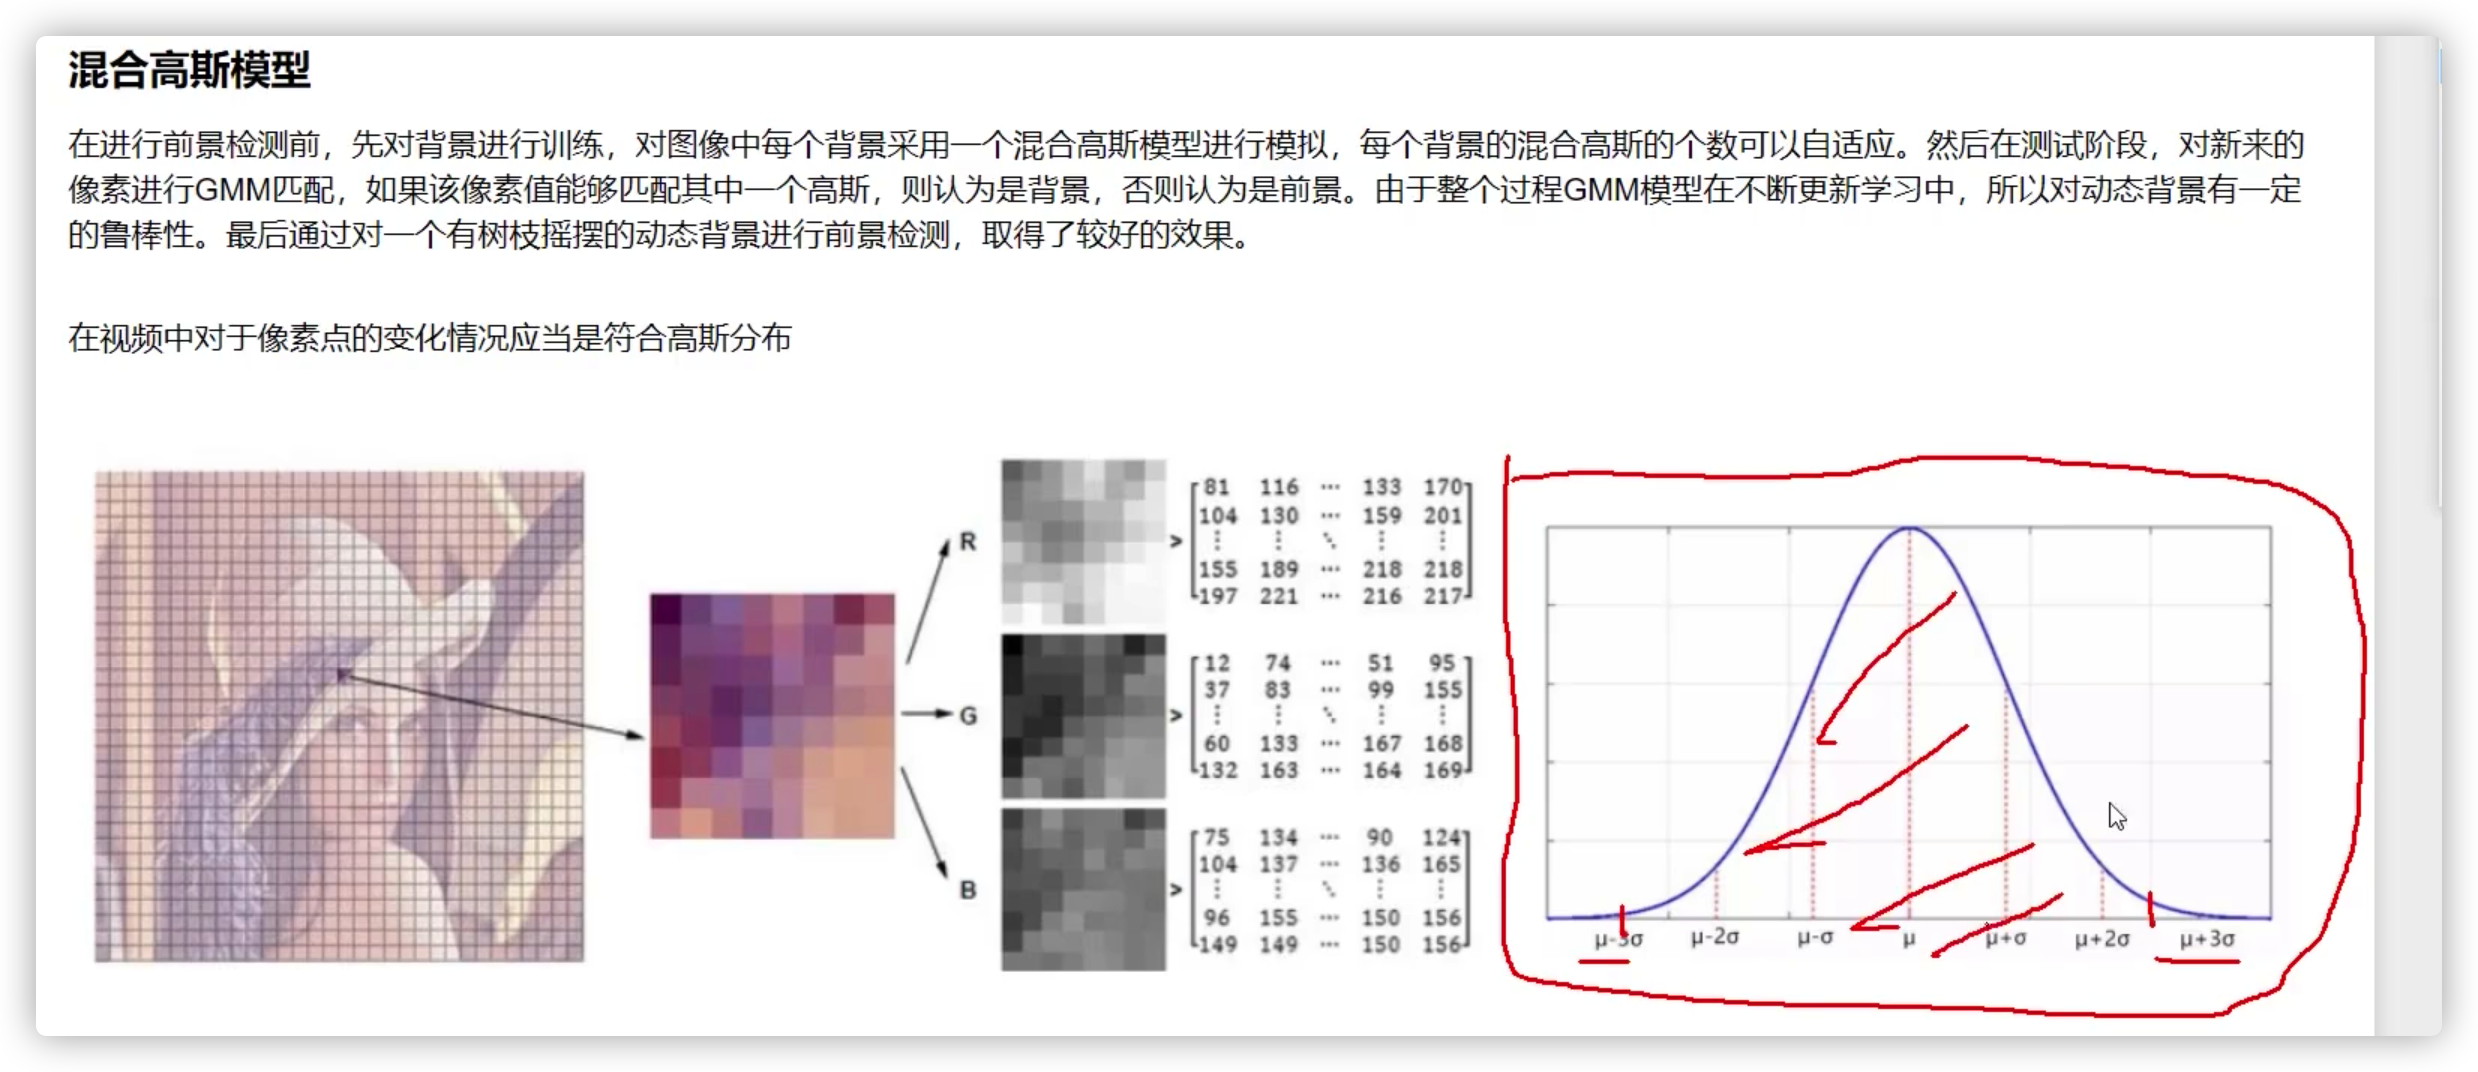
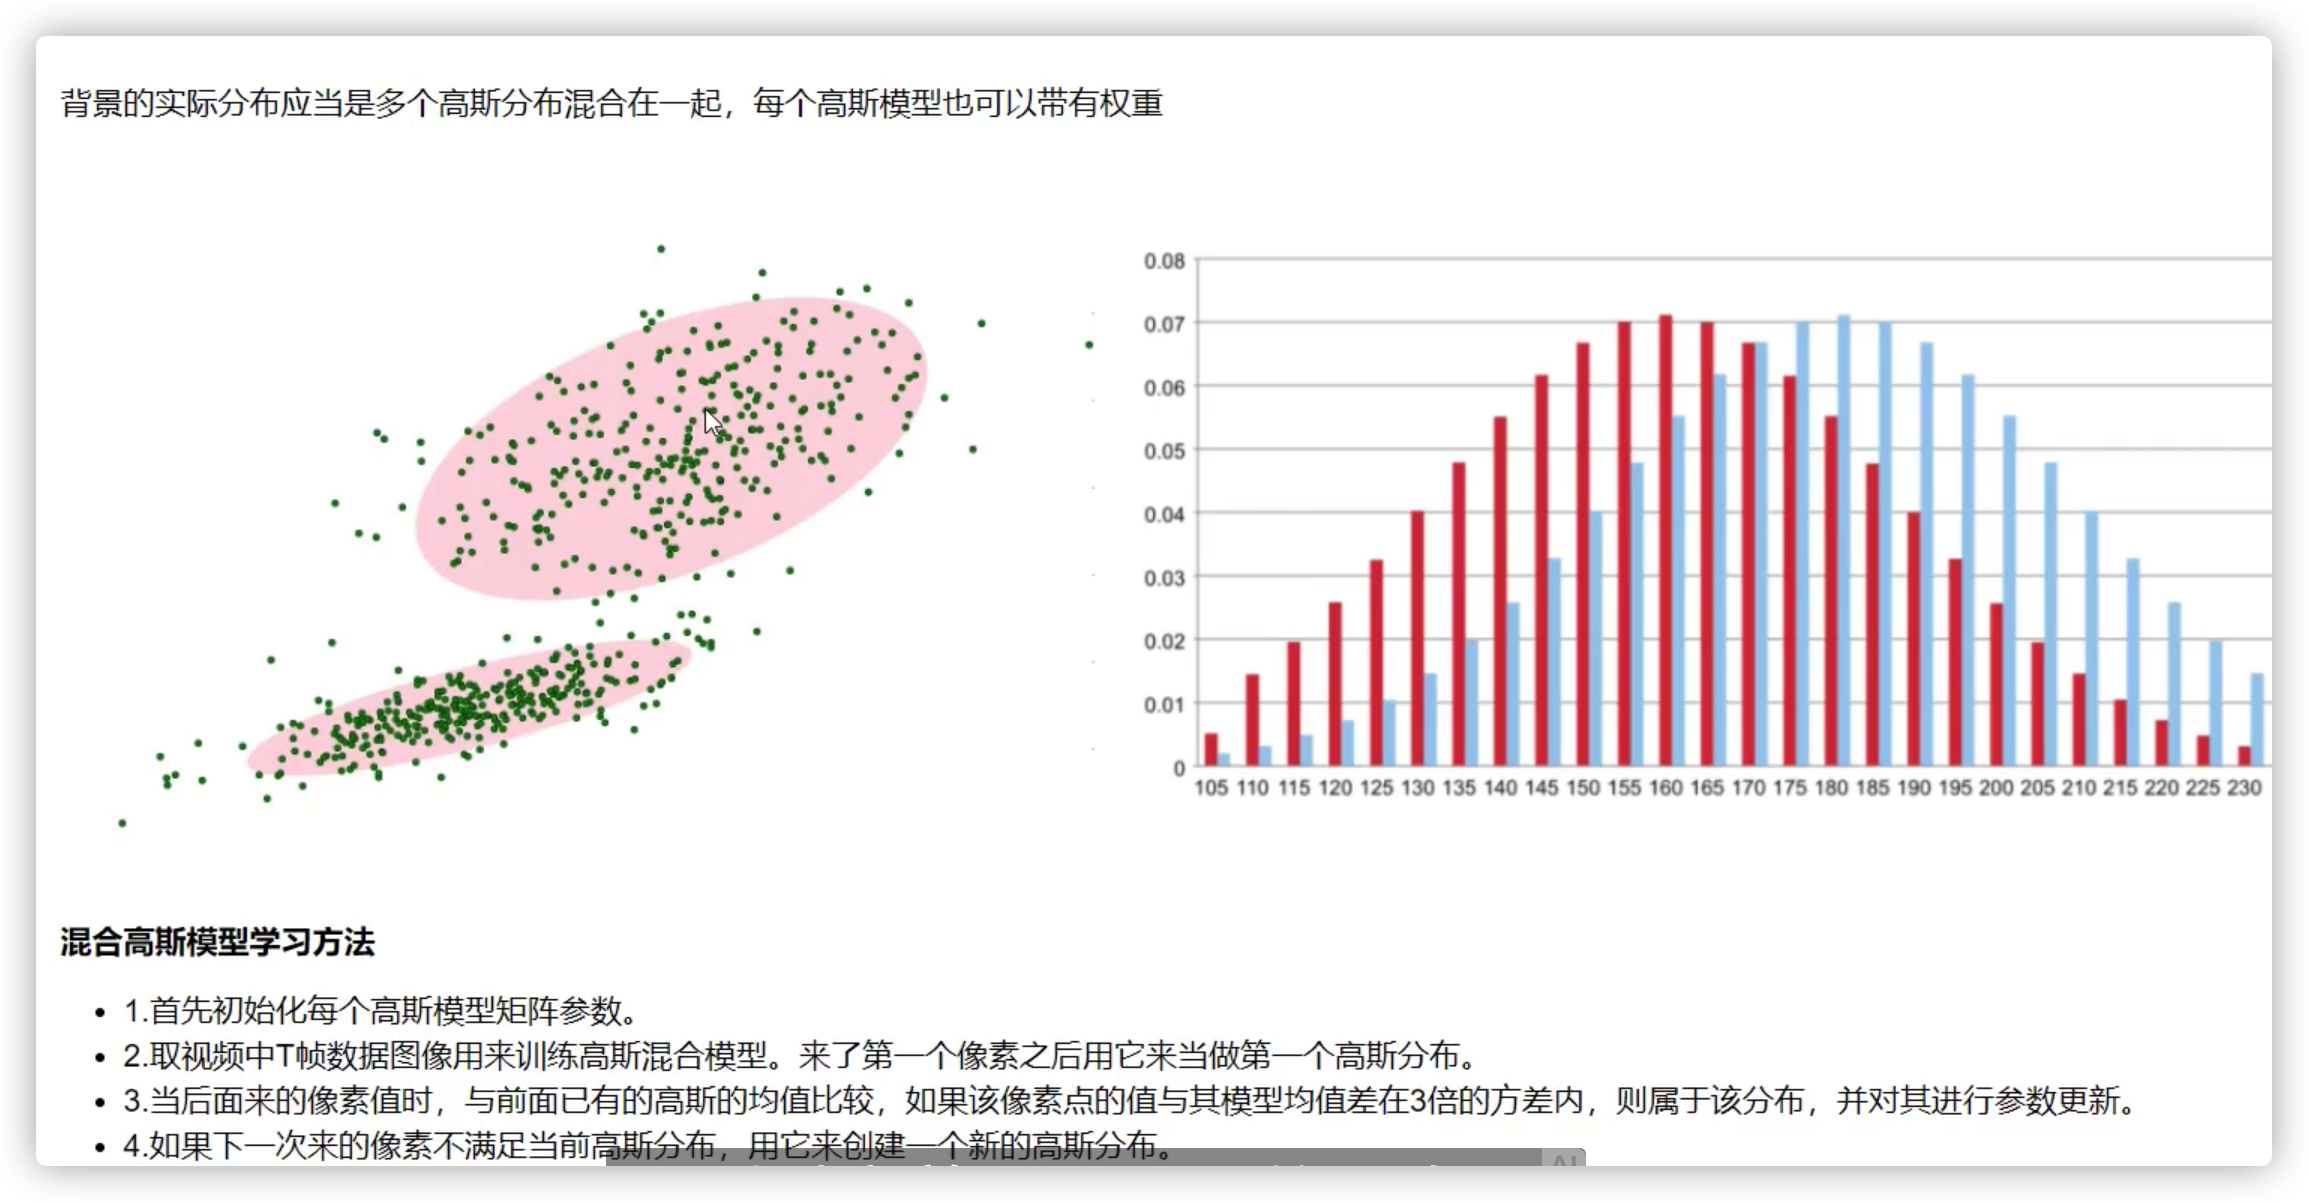混合高斯模型

In [11]:
import numpy as np
import cv2
cap=cv2.VideoCapture('car_parking.mp4')
kernel=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
fgbg=cv2.createBackgroundSubtractorMOG2()
while(1):
    ret,frame=cap.read()
    fgmask=fgbg.apply(frame)
    fgmask=cv2.morphologyEx(fgmask,cv2.MORPH_OPEN,kernel)
    contours,hierarchy=cv2.findContours(fgmask,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    for c in contours:
        perimeter=cv2.arcLength(c,True)
        if perimeter>2000:
            x,y,w,h=cv2.boundingRect(c)
            cv2.rectangle(frame,(x,y),((x+w),(y+h)),(255,0,0),2)
    cv2.imshow('frame',frame)
    cv2.imshow('fgmask',fgmask)
    k=cv2.waitKey(100) & 0xFF
    if k==27:
        break 
cap.release()
cv2.destroyAllWindows()
cv2.waitKey(1)

-1